In [10]:
import numpy as np
import pandas as pd
import glob

path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(df)

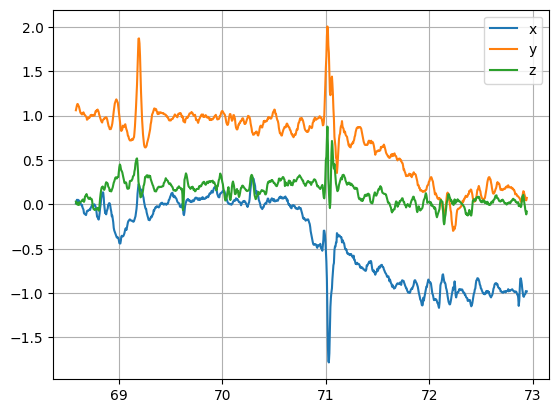

In [11]:
import matplotlib.pyplot as plt

df = li[101]

x = np.asarray(df.x)
y = np.asarray(df.y)
z = np.asarray(df.z)
t = np.asarray(df.t)

plt.plot(t,x,label='x')
plt.plot(t,y,label='y')
plt.plot(t,z,label='z')

plt.grid()
plt.legend()
plt.show()

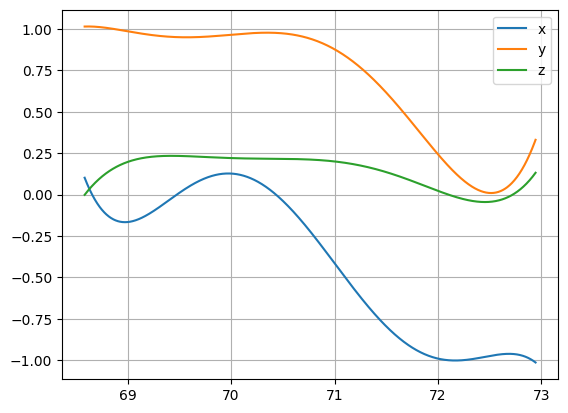

In [12]:
coef_x = np.polyfit(t,x,deg=5,full=False)
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = np.polyfit(t,y,deg=5,full=False)
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = np.polyfit(t,z,deg=5,full=False)
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

In [13]:
def extrapolate(ls,k):

    #########################################################
    ## INPUT:                                              ##
    ## - ls: list of .csv tables each made of measurements ##
    ##       along space axes x, y, z over time t          ##
    ## - k: degree of the polynomial fit                   ##
    ##                                                     ##
    ## OUTPUT:                                             ##
    ## - df: dataframe with original tables as rows and    ##
    ##       coefficients of the polynomial fit along x, y ##
    ##       and z as columns                              ##
    #########################################################

    # Create columns of the output dataset
    columns = []
    for prefix in ['x', 'y', 'z']:
        for i in range(0, k+1):
            columns.append(f"{prefix}_{i}")
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)

        # Get values from every table
        x = np.asarray(ls[i].x)
        y = np.asarray(ls[i].y)
        z = np.asarray(ls[i].z)
        t = np.asarray(ls[i].t)

        # Get coefficients of the polynomial fit of order k of x, y, z
        coef_x = np.polyfit(t,x,deg=k,full=False)
        coef_y = np.polyfit(t,y,deg=k,full=False)
        coef_z = np.polyfit(t,z,deg=k,full=False)
        
        # Add coefficients to the final dataset
        row = []
        for j in np.arange(k+1):
            row.append(coef_x[j])
        for j in np.arange(k+1):
            row.append(coef_y[j])
        for j in np.arange(k+1):
            row.append(coef_z[j])
        df.loc[i] = row

    return df


df = extrapolate(li,5)
df

,x_0,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5,z_0,z_1,z_2,z_3,z_4,z_5
0,-0.001146,0.287879,-28.910970,1450.618067,-3.636437e+04,3.643490e+05,-0.000810,0.201414,-20.035357,995.988873,-2.474333e+04,2.457522e+05,0.001417,-0.354840,35.534622,-1778.265993,4.446966e+04,-4.445691e+05
1,-0.000432,0.082809,-6.330716,241.462039,-4.594694e+03,3.489477e+04,0.000022,-0.004424,0.357892,-14.368129,2.864671e+02,-2.269506e+03,-0.000114,0.022736,-1.809435,71.699760,-1.415041e+03,1.112998e+04
2,-0.000766,0.147851,-11.403342,439.024895,-8.437030e+03,6.474689e+04,-0.000108,0.020381,-1.542750,58.308355,-1.100279e+03,8.293211e+03,0.000189,-0.034726,2.540693,-92.739007,1.688510e+03,-1.226523e+04
3,0.000183,-0.047307,4.893294,-252.534453,6.502099e+03,-6.681241e+04,-0.000768,0.205244,-21.924402,1170.311849,-3.121703e+04,3.328807e+05,0.000009,-0.002020,0.161113,-5.617914,6.864012e+01,1.522219e+02
4,0.000450,-0.135160,16.236132,-974.352580,2.921121e+04,-3.500058e+05,0.000116,-0.034483,4.092491,-242.677213,7.190049e+03,-8.515082e+04,-0.000874,0.261147,-31.186704,1860.752960,-5.546818e+04,6.608864e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.001570,-0.961964,235.697917,-28869.186461,1.767645e+06,-4.328401e+07,0.001719,-1.052964,257.970918,-31594.353624,1.934325e+06,-4.736098e+07,0.000351,-0.215160,52.754730,-6466.490470,3.962622e+05,-9.711660e+06
464,-0.012173,5.814655,-1110.857257,106096.606232,-5.065865e+06,9.673966e+07,0.012264,-5.858689,1119.305034,-106905.483526,5.104521e+06,-9.747730e+07,-0.004106,1.963432,-375.502619,35902.116346,-1.716078e+06,3.280606e+07
465,-0.016887,8.239304,-1607.808293,156853.665742,-7.650181e+06,1.492297e+08,0.017134,-8.363987,1632.945973,-159384.306498,7.777404e+06,-1.517851e+08,-0.005465,2.664006,-519.419625,50630.894543,-2.467328e+06,4.808863e+07
466,-0.000509,0.272884,-58.470795,6263.069040,-3.353694e+05,7.181879e+06,0.000386,-0.210351,45.864231,-4996.051117,2.719012e+05,-5.914597e+06,0.000203,-0.111712,24.595438,-2703.830201,1.484235e+05,-3.254917e+06


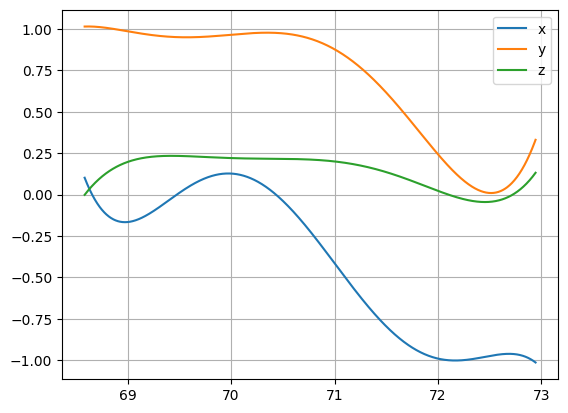

In [14]:
coef_x = df.iloc[101,:6]
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = df.iloc[101,6:12]
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = df.iloc[101,12:]
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

In [15]:
xyz=pd.read_csv("xyz.csv")
xyz

,x_0,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5,z_0,z_1,z_2,z_3,z_4,z_5
0,-0.001146,0.287879,-28.910970,1450.618067,-3.636437e+04,3.643490e+05,-0.000810,0.201414,-20.035357,995.988873,-2.474333e+04,2.457522e+05,0.001417,-0.354840,35.534622,-1778.265993,4.446966e+04,-4.445691e+05
1,-0.000432,0.082809,-6.330716,241.462039,-4.594694e+03,3.489477e+04,0.000022,-0.004424,0.357892,-14.368129,2.864671e+02,-2.269506e+03,-0.000114,0.022736,-1.809435,71.699760,-1.415041e+03,1.112998e+04
2,-0.000766,0.147851,-11.403342,439.024895,-8.437030e+03,6.474689e+04,-0.000108,0.020381,-1.542750,58.308355,-1.100279e+03,8.293211e+03,0.000189,-0.034726,2.540693,-92.739007,1.688510e+03,-1.226523e+04
3,0.000183,-0.047307,4.893294,-252.534453,6.502099e+03,-6.681241e+04,-0.000768,0.205244,-21.924402,1170.311849,-3.121703e+04,3.328807e+05,0.000009,-0.002020,0.161113,-5.617914,6.864012e+01,1.522219e+02
4,0.000450,-0.135160,16.236132,-974.352580,2.921121e+04,-3.500058e+05,0.000116,-0.034483,4.092491,-242.677213,7.190049e+03,-8.515082e+04,-0.000874,0.261147,-31.186704,1860.752960,-5.546818e+04,6.608864e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.001570,-0.961964,235.697917,-28869.186461,1.767645e+06,-4.328401e+07,0.001719,-1.052964,257.970918,-31594.353624,1.934325e+06,-4.736098e+07,0.000351,-0.215160,52.754730,-6466.490470,3.962622e+05,-9.711660e+06
464,-0.012173,5.814655,-1110.857257,106096.606232,-5.065865e+06,9.673966e+07,0.012264,-5.858689,1119.305034,-106905.483526,5.104521e+06,-9.747730e+07,-0.004106,1.963432,-375.502619,35902.116346,-1.716078e+06,3.280606e+07
465,-0.016887,8.239304,-1607.808293,156853.665742,-7.650181e+06,1.492297e+08,0.017134,-8.363987,1632.945973,-159384.306498,7.777404e+06,-1.517851e+08,-0.005465,2.664006,-519.419625,50630.894543,-2.467328e+06,4.808863e+07
466,-0.000509,0.272884,-58.470795,6263.069040,-3.353694e+05,7.181879e+06,0.000386,-0.210351,45.864231,-4996.051117,2.719012e+05,-5.914597e+06,0.000203,-0.111712,24.595438,-2703.830201,1.484235e+05,-3.254917e+06
